## Inlämningsuppgift 1
### 24 november 2022
#### Annette Ekblom

### Insallera biblotek och utforska data

Jag har valt att använda data av observationer på hudcancer. Datasetet innehåller variablerna: id, bild, cancertyp, anamnes, ålder, kön, och lokalisation (på kroppen).

In [160]:
# 1 och 2
import pandas as pd
import numpy as np


df = pd.read_csv('./skincancer.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


### Välj ut kolumner av inresse
Jag väljer ut kolumnerna kön och ålder eftersom de är determinanter för att utveckla cancer, samt vilken typ av cancer och var på kroppen den observerades eftersom jag är intresserad av att veta var på kroppen det vanligast förekommer samt vilket parti vi eventuellt behöver skydda oss mer på från solens ultravioletta strålar.

In [161]:
# 3

new_df = df[['dx','age','sex','localization']].copy()
new_df.head()

,dx,age,sex,localization
0,bkl,80.0,male,scalp
1,bkl,80.0,male,scalp
2,bkl,80.0,male,scalp
3,bkl,80.0,male,scalp
4,bkl,75.0,male,ear


### Datatyper och format
I mitt dataset återfinner jag 3 variabler med datatypen "object" (cancertyp, kön, lokalisation), och 1 med datatyp "float" (ålder). Det ser rimligt och bra ut. Variabeln ålder vill jag trots allt ändra från float till int.

In [162]:
# 4
new_df.dtypes 

new_df['age'] = new_df['age'].apply(np.int64) 

# jag får ett felmeddelande då NA värden inte kan konverteras till int. Jag behöver därför hantera NA värdena innan jag konverterar variabeln age till integers. 

ValueError: cannot convert float NaN to integer

### Hantera NA values

#### Age 
I variabeln age finns det 57 NA värden i variabeln age. Jag väljer att ersätta alla NA värden med medevärdet för variabeln 'age', på grunden att antalet NA värden inte är relativt många i förhållande till den totala antalet observationer, samt att syftet med uppgiften inte ämnar att generalisera. 

In [163]:
# 5
new_df.isnull().sum()

dx               0
age             57
sex              0
localization     0
dtype: int64

In [164]:
mean_age = new_df.age.mean()

In [165]:
from math import floor 

mean_age = floor(mean_age)

In [166]:
new_df.age.fillna(mean_age, inplace=True)
new_df.isnull().sum()

dx              0
age             0
sex             0
localization    0
dtype: int64

In [185]:
# Nu kan jag omvandla age till en integer
new_df['age'] = new_df['age'].apply(np.int64) 

In [191]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dx            10015 non-null  object
 1   age           10015 non-null  int64 
 2   sex           10015 non-null  object
 3   localization  10015 non-null  object
dtypes: int64(1), object(3)
memory usage: 313.1+ KB


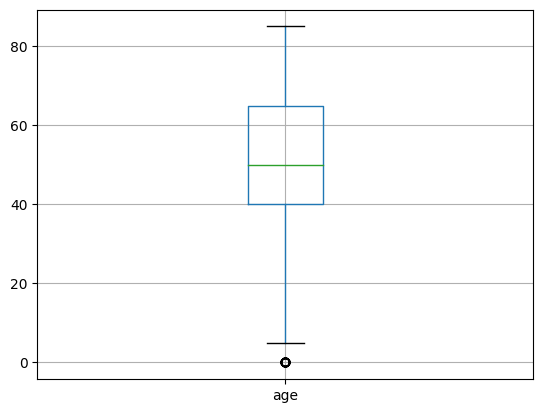

In [189]:
import matplotlib.pyplot as plt

new_df.boxplot(column='age')
plt.show()

### Utforska data

För kvinnor i datamaterialet är cancer uppkommen i nedre extremiteterna vanligast förekommande, följt av på ryggen. För män är det på ryggen, följt av nedre extremiteterna. 

In [184]:
new_df.groupby('sex')['localization'].value_counts(normalize=True).mul(100)

sex      localization   
female   lower extremity    25.307557
         back               18.519332
         trunk              14.015817
         upper extremity    10.896309
         abdomen             9.512302
         face                7.644991
         foot                3.800527
         chest               3.119508
         unknown             2.086995
         neck                1.603691
         hand                1.252197
         genital             0.746924
         scalp               0.681019
         ear                 0.659051
         acral               0.153779
male     back               24.916759
         lower extremity    17.110618
         trunk              14.113947
         upper extremity    11.505734
         abdomen            10.858306
         face                7.343692
         chest               4.901961
         foot                2.645209
         scalp               1.794303
         neck                1.757307
         unknown         

In [198]:
df_female = new_df[new_df['sex'].isin(["female"])]
df_female.head()

,dx,age,sex,localization
8,bkl,70,female,back
9,bkl,70,female,back
10,bkl,55,female,trunk
11,bkl,85,female,chest
12,bkl,85,female,chest


In [199]:
df_male = new_df[new_df['sex'].isin(["male"])]
df_male.head()

,dx,age,sex,localization
0,bkl,80,male,scalp
1,bkl,80,male,scalp
2,bkl,80,male,scalp
3,bkl,80,male,scalp
4,bkl,75,male,ear


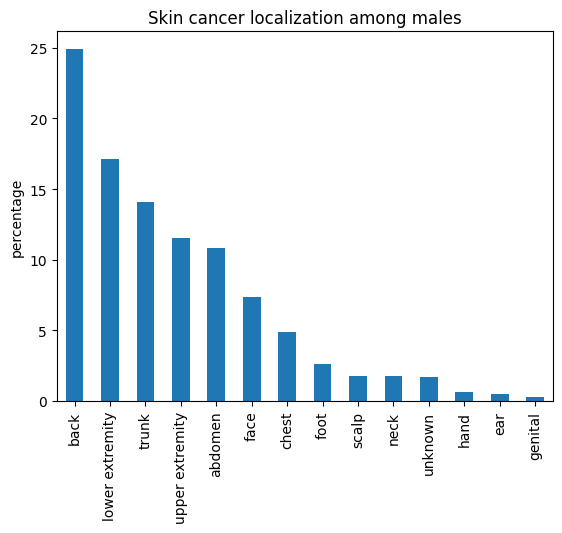

In [200]:
df_male['localization'].value_counts(normalize=True).mul(100).plot.bar()
plt.title('Skin cancer localization among males')
plt.ylabel('percentage')
plt.show()

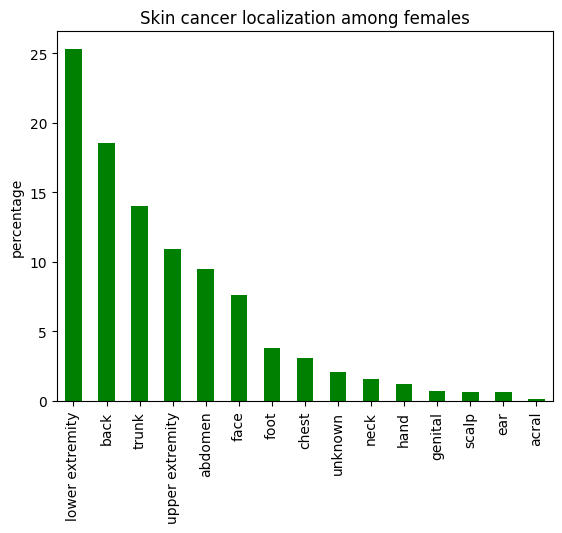

In [201]:
df_female['localization'].value_counts(normalize=True).mul(100).plot.bar(color='green')
plt.title('Skin cancer localization among females')
plt.ylabel('percentage')
plt.show()

### Hantera NA värden fort.

Datan innehåller några "unknown" observationer (n = 234) i variablen lokalisation av cancern. Jag väljer att radera dessa värden då de är marginella av de total 10015 rader. Jag kodar om dem och kodar "unknown" = 14, för att sedan kunna filtrera ut det. 

In [202]:
new_df.value_counts('localization')

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
dtype: int64

In [138]:
new_df['localization'] = new_df['localization'].replace("back", 0)
new_df['localization'] = new_df['localization'].replace("lower extremity", 1)
new_df['localization'] = new_df['localization'].replace("trunk", 2)
new_df['localization'] = new_df['localization'].replace("upper extremity", 3)
new_df['localization'] = new_df['localization'].replace("abdomen", 4)
new_df['localization'] = new_df['localization'].replace("face", 5)
new_df['localization'] = new_df['localization'].replace("chest", 6)
new_df['localization'] = new_df['localization'].replace("foot", 7)
new_df['localization'] = new_df['localization'].replace("neck", 8)
new_df['localization'] = new_df['localization'].replace("scalp", 9)
new_df['localization'] = new_df['localization'].replace("hand", 10)
new_df['localization'] = new_df['localization'].replace("ear", 11)
new_df['localization'] = new_df['localization'].replace("genital", 12)
new_df['localization'] = new_df['localization'].replace("acral", 13)
new_df['localization'] = new_df['localization'].replace("unknown", 14)

In [140]:
# Radera "unkown" eller 14
new_df.drop(new_df[new_df['localization'] == 14].index, inplace = True)

In [141]:
new_df.localization.value_counts()

0     2190
1     2077
2     1401
3     1118
4     1020
5      745
6      407
7      316
8      168
9      128
10      90
11      56
12      48
13       7
Name: localization, dtype: int64

### Utforska data

För att lättare kunna visualisera omvandlar jag den numeriska variabeln ålder till en kategorisk variabel för män och kvinnor.

In [204]:
new_df.age.max()

85

In [206]:
new_df.age.min()

0

In [215]:
df_female['age_cat'] = pd.cut(df_female['age'], bins=[0, 17, 34, 51, 68, float('Inf')], labels=['0-17', '18-34', '35-51', '52-68', '69-85'])
print(df_female)

          dx  age     sex     localization age_cat
8        bkl   70  female             back   69-85
9        bkl   70  female             back   69-85
10       bkl   55  female            trunk   52-68
11       bkl   85  female            chest   69-85
12       bkl   85  female            chest   69-85
...      ...  ...     ...              ...     ...
10003  akiec   60  female             face   52-68
10006  akiec   55  female             face   52-68
10007  akiec   60  female             face   52-68
10009  akiec   75  female  lower extremity   69-85
10014    mel   70  female             back   69-85

[4552 rows x 5 columns]


/var/folders/fs/_nrysy_d0d12jllxt789_8l80000gn/T/ipykernel_6583/2630237546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['age_cat'] = pd.cut(df_female['age'], bins=[0, 17, 34, 51, 68, float('Inf')], labels=['0-17', '18-34', '35-51', '52-68', '69-85'])


In [214]:
df_male['age_cat'] = pd.cut(df_male['age'], bins=[0, 17, 34, 51, 68, float('Inf')], labels=['0-17', '18-34', '35-51', '52-68', '69-85'])
print(df_male)

          dx  age   sex localization age_cat
0        bkl   80  male        scalp   69-85
1        bkl   80  male        scalp   69-85
2        bkl   80  male        scalp   69-85
3        bkl   80  male        scalp   69-85
4        bkl   75  male          ear   69-85
...      ...  ...   ...          ...     ...
10008  akiec   60  male         face   52-68
10010  akiec   40  male      abdomen   35-51
10011  akiec   40  male      abdomen   35-51
10012  akiec   40  male      abdomen   35-51
10013  akiec   80  male         face   69-85

[5406 rows x 5 columns]


/var/folders/fs/_nrysy_d0d12jllxt789_8l80000gn/T/ipykernel_6583/3539719413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['age_cat'] = pd.cut(df_male['age'], bins=[0, 17, 34, 51, 68, float('Inf')], labels=['0-17', '18-34', '35-51', '52-68', '69-85'])


### Visualisering 

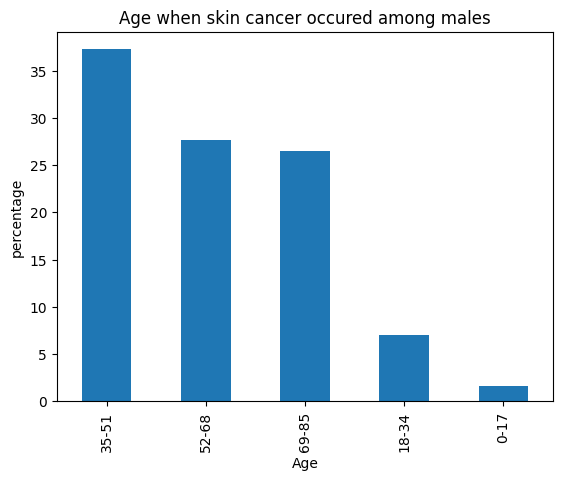

In [226]:
df_male['age_cat'].value_counts(normalize=True).mul(100).plot.bar()
plt.title('Age when skin cancer occured among males')
plt.ylabel('percentage')
plt.xlabel('Age')
plt.show()

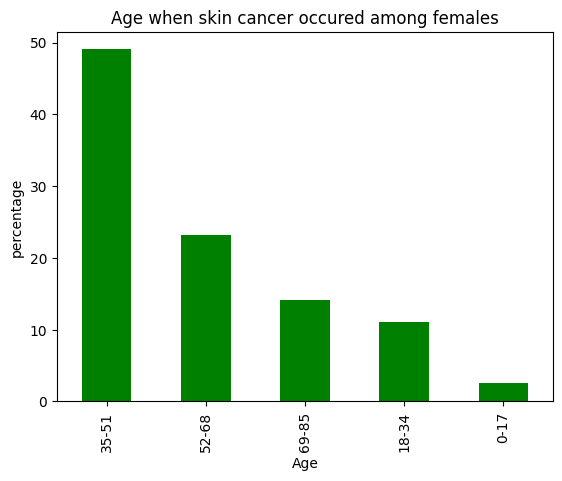

In [227]:
df_female['age_cat'].value_counts(normalize=True).mul(100).plot.bar(color='green')
plt.title('Age when skin cancer occured among females')
plt.ylabel('percentage')
plt.xlabel('Age')
plt.show()

### Utvärdering av data

Mitt data är naturligtvis inte komplett, men ett urval har tagits genom observationer och skulle kunna vara representativt i en studie. För att kunna dra slutsatser behöver man gå vidare med statistiska test. Jag valde ett dataset som framför allt hade kategorisk data, varför jag inte kunde utföra korrelationstestet. Det var inget jag tänkte på från början, utan jag lät mitt intresse guida mig när jag valde data. Nästa gång ska jag tänka på att välja passande data om jag vill utföra utvalda test. 


### Bedömning

Förutsatt att hög solexponering och solens ultravioletta strålar ökar risken för hudcancer, som angetts av vårdriktlinjer (källa: https://vardgivare.skane.se/vardriktlinjer/cancer/ako/hudmelanom/), verkar det som att kvinnor i större utsträckning exponerar sina ben för solen. Det är rimligt då kvinnor ofta vill vara bruna på benen under sommaren, och eventuellt inte tänkter på att smörja in dem med skyddsfaktor. Samma gäller bröstet och ryggen (back and trunk) som kvinnor kanske i högre utsträckning smörjer eller täcker, men fortfarande exponerar för mycket. Likaså vad det gäller männen, är ryggen det område på kroppen som de verkar utsätta mest för hög solexponering. Ryggen är ett område var det är svårt att komma åt att smörja med solskyddsfaktor. 

Både för kvinnorna och männen var åldergruppen 35 - 51 år mest förekommande i datasetet som hade drabbats av cancer. Det är rimligt att tänka att datamaterialet utgöras av flest deltagare som är i den åldergruppen. Min bedömning är att ingen slutsats kan dras från vilken åldergrupp som i större utsträckning  drabbas av hudcancer. 